In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [0]:
dados_treino = pd.read_csv('treino.csv', index_col='Id')
dados_teste = pd.read_csv('teste.csv', index_col='Id')

In [0]:
X = dados_treino.copy()
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [0]:
colunas_numericas = [coluna for coluna in X.columns if X[coluna].dtype in ['int64', 'float64']]

In [0]:
X = X[colunas_numericas]
X_test = dados_teste[colunas_numericas].copy()

In [0]:
pipeline_1 = Pipeline(steps=[
    ('preprocessador', SimpleImputer()),
    ('modelo', RandomForestRegressor(n_estimators=50, random_state=42))
])

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
maes = cross_val_score(pipeline_1, 
                         X, y,
                         cv=5,
                         scoring='neg_mean_absolute_error')

In [18]:
print("Média do MAE:", maes.mean())

Média do MAE: -18205.873470319635


In [0]:
maes = -1 * cross_val_score(pipeline_1, 
                         X, y,
                         cv=5,
                         scoring='neg_mean_absolute_error')

In [15]:
print("Média do MAE:", maes.mean())

Média do MAE: 18205.873470319635


Podemos usar a validação cruzada também para ter uma idéia de qual o melhor número de árvores na nossa floresta.

Para isso, vamos fazer uma função que itere pelos 50 estimators e plote um gráfico.

In [0]:
def obter_maes(n_estimators):
    pipeline_maes = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))])
    scores = -1 * cross_val_score(pipeline_maes, 
                                  X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [0]:
resultados = {}
for i in range(1, 9):
  resultados[50*i] = obter_maes(50*i)

In [23]:
resultados

{50: 18353.8393511688,
 100: 18395.2151680032,
 150: 18288.730020956387,
 200: 18248.345889801505,
 250: 18255.26922247291,
 300: 18275.241922621914,
 350: 18270.29183308043,
 400: 18270.197974402367}

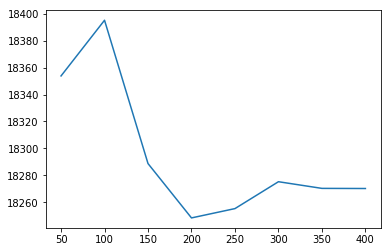

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(resultados.keys(), resultados.values())
plt.show()

In [0]:
melhor_n_estimators = min(resultados, key=resultados.get)

In [26]:
melhor_n_estimators

200